In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [2]:
#MAX = BLACK
import numpy as np
import math
class State:
    def __init__(self):
        self.game_board = self.intial_game_board()
        self.current_player = "MAX"
        
    def intial_game_board(self):
        initial_state = np.zeros(shape=(8,8), dtype=np.int32)        
        initial_state[3,3] = 1
        initial_state[4,3] = -1
        initial_state[3,4] = -1
        initial_state[4,4] = 1
        return initial_state

In [3]:
import copy
columns = {"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6,"H":7}
upper_limit = 7
lower_limit = 0
def out_of_boundaries(pos):
    return pos<0 or pos>7

def not_out_of_limits(row, column):
    return not out_of_boundaries(row) and not out_of_boundaries(column)

def vertical_up_direction_update_function(row, column):
    return row+1, column

def vertical_down_direction_update_function(row, column):
    return row-1, column

def horizontal_left_direction_update_function(row, column):
    return row, column-1

def horizontal_right_direction_update_function(row, column):
    return row, column+1

def diagonal_ul_direction_update_function(row, column):
    return row+1, column-1

def diagonal_ur_direction_update_function(row, column):
    return row+1, column+1

def diagonal_dl_direction_update_function(row, column):
    return row-1, column-1

def diagonal_dr_direction_update_function(row, column):
    return row-1, column+1

def flank(state, value, row, column, direction_update_function):
    result_state = copy.deepcopy(state)
    opposite_value = value*-1
    successful_flanking = False
    current_row, current_column = direction_update_function(row, column)
    if not_out_of_limits(current_row, current_column) and result_state.game_board[current_row, current_column] == opposite_value:
        while(not_out_of_limits(current_row, current_column) and result_state.game_board[current_row, current_column] == opposite_value):
            result_state.game_board[current_row, current_column] = value
            current_row, current_column = direction_update_function(current_row, current_column)
        if not_out_of_limits(current_row, current_column) and result_state.game_board[current_row, current_column] == value: #flanqueo exitoso
            successful_flanking = True
        if successful_flanking:
            result_state.game_board[row, column] = value
            return result_state
    return state

In [4]:
a = State()
#print(flank(a,-1,5,4,vertical_down_direction_update_function).game_board)
#print(flank(a,-1,2,3,vertical_up_direction_update_function).game_board)
#print(flank(a,-1,3,2,horizontal_right_direction_update_function).game_board)
#print(flank(a,-1,4,5,horizontal_left_direction_update_function).game_board)
a.game_board[5,2]=1
a.game_board[3,2]=1
a.game_board[2,5]=1
a.game_board[4,5]=1
print(a.game_board)
#print(flank(a,-1,1,6,diagonal_ul_direction_update_function).game_board)
#print(flank(a,-1,2,1,diagonal_ur_direction_update_function).game_board)
#print(flank(a,-1,5,6,diagonal_dl_direction_update_function).game_board)
#print(flank(a,-1,6,1,diagonal_dr_direction_update_function).game_board)

#probando limites
print("--------------")
a.game_board[0,7]=1
a.game_board[1,6]=-1
a.game_board[2,5]=0
print(flank(a,1,2,5,diagonal_dr_direction_update_function).game_board)

[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  1  1 -1  0  0  0]
 [ 0  0  0 -1  1  1  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
--------------
[[ 0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  1  1 -1  0  0  0]
 [ 0  0  0 -1  1  1  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


In [7]:
def get_player_value(state):
    value = 1
    if state.current_player == "MAX":
        value = -1
    return value

In [8]:
def change_player(state):
     if state.current_player == "MAX":
        return "MIN"
     else:
        return "MAX"

In [9]:
def result(state, action):
    result_state = copy.deepcopy(state)
    column = columns[action[0]]
    row = int(action[1])-1
#     print("res", row, column)
    value = get_player_value(state)    
    
#     result_state.game_board[current_row, current_column] = value
    opposite_value = value*-1
    
    result_state = flank(result_state,value,row,column,vertical_down_direction_update_function)
    result_state = flank(result_state,value,row,column,vertical_up_direction_update_function)
    result_state = flank(result_state,value,row,column,horizontal_right_direction_update_function)
    result_state = flank(result_state,value,row,column,horizontal_left_direction_update_function)
    result_state = flank(result_state,value,row,column,diagonal_ul_direction_update_function)
    result_state = flank(result_state,value,row,column,diagonal_ur_direction_update_function)
    result_state = flank(result_state,value,row,column,diagonal_dl_direction_update_function)
    result_state = flank(result_state,value,row,column,diagonal_dr_direction_update_function)
#     result_state = move_vertical(result_state, value, current_row, current_column)
#     result_state = move_horizontal(result_state, value, current_row, current_column)
#     result_state = move_diagonal(result_state, value, current_row, current_column)   
    return result_state

In [10]:
def get_possible_move(state, value, row, column, direction_update_function):
    result_state = copy.deepcopy(state)
    opposite_value = value*-1
    successful_flanking = False
    current_row, current_column = direction_update_function(row, column)
#     print(current_row, current_column)
    if not_out_of_limits(current_row, current_column) and result_state.game_board[current_row, current_column] == opposite_value:
        while(not_out_of_limits(current_row, current_column) and result_state.game_board[current_row, current_column] == opposite_value):
#             print(current_row, current_column)
            result_state.game_board[current_row, current_column] = value
            current_row, current_column = direction_update_function(current_row, current_column)
        if not_out_of_limits(current_row, current_column) and result_state.game_board[current_row, current_column] == 0: #flanqueo exitoso
            successful_flanking = True
#         if successful_flanking:
#             result_state.game_board[row, column] = value
#             return result_state
    return successful_flanking, current_row, current_column

In [11]:
moves = [vertical_down_direction_update_function,vertical_up_direction_update_function,horizontal_right_direction_update_function,horizontal_left_direction_update_function,diagonal_ul_direction_update_function,diagonal_ur_direction_update_function,diagonal_dl_direction_update_function,diagonal_dr_direction_update_function]
def get_possible_actions(state, row, column, value, possible_actions_matrix):
    possible_actions = copy.deepcopy(possible_actions_matrix)  
    for move in moves:
#         print(move)
        success, possible_move_row, possible_move_column = get_possible_move(state,value,row,column,move)
#         print(state.game_board)
        if success:
            possible_actions[possible_move_row, possible_move_column] = 1
#             possible_actions.append([possible_move_row, possible_move_column])
    return possible_actions

In [12]:
m = get_possible_actions(State(), 3,4, -1,np.zeros(shape=(8,8), dtype=np.int32)   )
get_possible_actions(State(), 4,3, -1,m )
#print("--------")
#m = get_possible_actions(State(), 4,3, 1,np.zeros(shape=(8,8), dtype=np.int32)   )
#get_possible_actions(State(), 3,4, 1,m )

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [13]:
map_values = {0:"A",1:"B",2:"C",3:"D",4:"E",5:"F",6:"G",7:"H"}
def actions(state):
    possible_actions_matrix= np.zeros(shape=(8,8), dtype=np.int32)     
    value = get_player_value(state)
    pos_values_player = np.where(state.game_board == value)  
    pos_values_player = list(zip(pos_values_player[0],pos_values_player[1]))
    possible_actions = []
    for pos in pos_values_player: 
        possible_actions_matrix = get_possible_actions(state, pos[0], pos[1], value, possible_actions_matrix)       
    pos_possible_actions_player = np.where(possible_actions_matrix == 1)
    pos_possible_actions_player = list(zip(pos_possible_actions_player[0],pos_possible_actions_player[1]))
    pos_possible_actions_player = list(map(lambda action: str(map_values[action[1]])+str(action[0]+1), pos_possible_actions_player))
    return pos_possible_actions_player, possible_actions_matrix

In [15]:
print(State().current_player)
State().current_player = "MIN"
print(State().current_player)
pos, mti=actions(State())
print(pos)
print(mti)
len(pos)

MAX
MAX
['D3', 'C4', 'F5', 'E6']
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


4

In [55]:
max_depth = 3
def cut_off(state, depth):
    return depth==max_depth

In [21]:
def min_max_cutoff(state):
#     print(state.game_board)
    values = []
    p, func_value, func_arg = player(state)
#     print("player: ",p)
#     state.current_player = p
    state_actions, possible_actions_matrix = actions(state)
#     acts = []
    print("state_actions",state_actions)
    for action in state_actions:       
#         for pos in action:
#         print("*****************************")
#         print("action min max",action)
#             state = 
        v = func_value(result(copy.deepcopy(state), action), -math.inf, math.inf,0)
        values.append(v)
#         acts.append(action)
#         print("vvv=",v)
#         state_actions = actions(state)
    #np.func_arg(values)
    idx = func_arg(values)
    print("act",state_actions)
    print(values)
    print("idx", idx)
    return state_actions[idx]

# def terminal_test(state):
#     if len(actions(state)) == 0:
#         return True
#     return False

def heuristic(state):
    heuristic = 0
#     print(np.where(state.game_board == -1))
    if state.current_player == "MAX":
#         print(np.where(state.game_board == -1))
        heuristic = len(np.where(state.game_board == -1)[0])
    else:        
        heuristic = len(np.where(state.game_board == 1)[0])*-1
#     print("heuristic:", heuristic)
    return heuristic
def heuristic_mobility(state):
    heuristic = 0
    result_state = copy.deepcopy(state)
    print( result_state.current_player) 
    max_moves,matrix_max=actions( result_state)
    possible_moves_max = len(max_moves)
    print(possible_moves_max) 
    result_state.current_player = "MIN"
    print( result_state.current_player)        
    min_moves,matrix_min=actions(result_state)
    possible_moves_min = len(min_moves)
    print(possible_moves_min) 
    if possible_moves_max + possible_moves_min != 0:
        heuristic=100*(possible_moves_max-possible_moves_min)/(possible_moves_max+possible_moves_min)
    else: 
        heuristic=0
    return heuristic
    
def player(state):
    if state.current_player == "MAX":
        return ("MAX", min_value,np.argmax)
    else:
        return ("MIN", max_value, np.argmin)   

In [22]:
a = State()
a.game_board[1,1]=-1
a.game_board[1,2]=-1
a.game_board[1,3]=-1
a.game_board[1,5]=1
#a.game_board[1,6]=-1
# a.game_board[1,5]=1
print(a.game_board)
heuristic(a)

[[ 0  0  0  0  0  0  0  0]
 [ 0 -1 -1 -1  0  1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1 -1  0  0  0]
 [ 0  0  0 -1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


5

In [25]:
a = State()
a.game_board[1,1]=-1
a.game_board[1,2]=-1
a.game_board[1,3]=-1
a.game_board[5,2]=1
a.game_board[5,3]=1
# a.game_board[1,5]=1
print(a.game_board)
heuristic_mobility(a)

[[ 0  0  0  0  0  0  0  0]
 [ 0 -1 -1 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1 -1  0  0  0]
 [ 0  0  0 -1  1  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
MAX
6
MIN
4


20.0

In [16]:
def min_value(state, alpha, beta, depth):
    state.current_player = "MIN"
#     print("--------------min_value: depht = ", depth)
    if cut_off(state, depth):
        return heuristic(state)
    v = math.inf
#     print(state.game_board)
    state_actions, possible_actions_matrix = actions(state)
#     print("state_actions",state_actions)
    for action in state_actions:
#         for pos in a:
#         print("action", action)
        v = min(v, max_value(result(copy.deepcopy(state), action), alpha, beta, depth+1))
        if v<=alpha:#prunning
            return v
        beta = min(beta, v)
#     print("v = ",v)
    return v

def max_value(state, alpha, beta, depth):
    state.current_player = "MAX"
#     print("-----------max_value:depth = ", depth)
    if cut_off(state, depth):
        return heuristic(state)
    v = -math.inf
#     print(state.game_board)
    state_actions = state_actions, possible_actions_matrix = actions(state)
#     print("state_actions",state_actions)
    for action in state_actions:
#         for pos in a:
#         print("action", action)
        v = max(v, min_value(result(copy.deepcopy(state), action), alpha, beta, depth+1))
        if v>= beta:
            return v
        alpha = max(alpha, v)
#     print("v = ",v)
    return v

In [17]:
a = State()
a.game_board[1,1]=1
a.game_board[4,5]=-1
a.game_board[2,2]=1
a.game_board[3,3]=-1
a.game_board[3,2]=1
print(a.game_board)
# a.game_board =  [[ 0,  0,  0,  0,  0,  0,  0,  0],
#                  [ 0,  0,  0,  0,  0,  0,  0,  0],
#                  [ 0,  0,  0,  0,  0,  1,  0,  0],
#                  [ 0,  0,  1,  1, -1,  0,  0,  0],
#                  [ 0,  0,  0, -1,  1,  1,  0,  0],
#                  [ 0,  0,  1,  0,  0,  0,  0,  0],
#                  [ 0,  0,  0,  0,  0,  0,  0,  0],
#                  [ 0,  0,  0,  0,  0,  0,  0,  0]]
min_max_cutoff(a)

[[ 0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  1 -1 -1  0  0  0]
 [ 0  0  0 -1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
act ['A1', 'B3', 'B4', 'E6', 'F6']
[-4, -5, -4, -5, -4]
idx 0


'A1'

In [18]:
a=State()
a.current_player = "MIN"
a.game_board[3,2]=-1
a.game_board[0,0]=-1
a.game_board[7,7]=-1
a.game_board[1,2]=-1
a.game_board[4,6]=-1
print(a.game_board)
actions(a)

[[-1  0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0 -1  1 -1  0  0  0]
 [ 0  0  0 -1  1  0 -1  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1]]


(['E3', 'B4', 'F4', 'C5', 'D6'],
 array([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]))

In [22]:
game_state = State()
possible_moves = actions(game_state)
# print(possible_moves)
# while len(possible_moves) > 0:
while len(possible_moves) > 0:
    print("---------------------------------------------")
    print("PLAYER: ",game_state.current_player)
    print("player_value = ", get_player_value(game_state))
    possible_moves, mat = actions(game_state)
    print("POSSIBLE MOVES: ",possible_moves)
    print(game_state.game_board)
    if game_state.current_player == "MAX":
        best_action = min_max_cutoff(game_state)
        game_state = result(game_state, best_action.upper())
    else:
        action = input()   
        game_state = result(game_state, action.upper())
    game_state.current_player = change_player(game_state)

---------------------------------------------
PLAYER:  MAX
player_value =  -1
POSSIBLE MOVES:  ['D3', 'C4', 'F5', 'E6']
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1 -1  0  0  0]
 [ 0  0  0 -1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
act ['D3', 'C4', 'F5', 'E6']
[-3, -3, -3, -3]
idx 0
---------------------------------------------
PLAYER:  MIN
player_value =  1
POSSIBLE MOVES:  ['C3', 'E3', 'C5']
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0]
 [ 0  0  0 -1 -1  0  0  0]
 [ 0  0  0 -1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
---------------------------------------------
PLAYER:  MAX
player_value =  -1
POSSIBLE MOVES:  ['B3', 'C4', 'F5', 'E6']
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1 -1  0  0  0  0]
 [ 0  0  0  1 -1  0  0  0]
 [ 0  0  0 -1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0]

KeyboardInterrupt: Interrupted by user

In [20]:
# game_state = State()
# # possible_moves = actions(game_state)
# # print(possible_moves)
# # while len(possible_moves) > 0:
# while len(possible_moves) > 0:
#     print("---------------------------------------------")
#     print("PLAYER: ",game_state.current_player)
#     print("player_value = ", get_player_value(game_state))
#     possible_moves, mat = actions(game_state)
#     print("POSSIBLE MOVES: ",possible_moves)
#     print(game_state.game_board)
#     action = input()   
#     game_state = result(game_state, action.upper())
#     game_state.current_player = change_player(game_state)

In [31]:
import pandas as pd 
df_Heuristic_1 = pd.read_csv("Heuristic_1.csv",sep=';') 
print(df_Heuristic_1)
meanComputer=df_Heuristic_1['COMPUTER'].mean()
meanHuman=df_Heuristic_1['HUMAN'].mean()
print("AVG COMPUTER: ",meanComputer)
print("AVG HUMAN: ",meanHuman)

   COMPUTER  HUMAN
0        32     32
1        35      7
2        19     11
3        35     29
4        35     28
5        14     50
6        31     33
7        23     15
8        21      9
9        34     30
AVG COMPUTER:  27.9
AVG HUMAN:  24.4


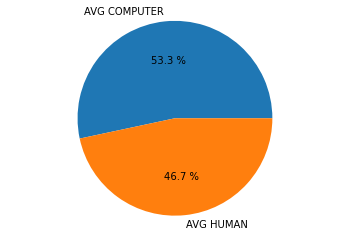

In [39]:
avgNumber = [27.9, 24.4]
AVG = ["AVG COMPUTER","AVG HUMAN"]
plt.pie(avgNumber, labels=AVG, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

In [36]:
df_depth1_3_5 = pd.read_csv("depth_1_3_5.csv", sep=";") 
print(df_depth1_3_5)
mean1=df_depth1_3_5['Depth_1'].mean()
mean3=df_depth1_3_5['Depth_3'].mean()
mean5=df_depth1_3_5['Depth_5'].mean()
print("AVG DEPTH_1: ",mean1)
print("AVG DEPTH_3: ",mean3)
print("AVG DEPTH_5: ",mean5)

    Depth_1  Depth_3  Depth_5
0     0.014    0.681   11.471
1     4.414    1.299    7.639
2     0.016    0.562   12.397
3     1.313    1.440    7.531
4     0.024    0.833    2.818
5     0.896    1.012   18.317
6     0.019    0.691   11.219
7     0.898    0.952    3.604
8     0.005    0.608    7.535
9     0.826    7.928    9.574
10    0.024    0.979    4.768
11    1.201    1.322    9.841
12    0.013    1.199    6.768
13    0.958    1.097    9.841
14    0.009    0.653    4.014
15    1.292    1.228    2.966
16    0.029    0.419   11.471
17    1.001    1.013    9.574
18    0.024    0.589   18.317
19    0.909    1.366   11.471
20    0.018    0.951    7.535
21    1.378    1.028   14.768
22    0.027    0.141   10.471
23    1.098    3.676   17.535
24    0.022    0.398   11.471
25    0.989    1.157   16.768
26    0.019    0.198   13.604
27    0.934    7.381   18.317
28    0.036    0.202   19.574
29    1.303    6.709   11.471
AVG DEPTH_1:  0.6569666666666667
AVG DEPTH_3:  1.5904
AVG DEPTH_5:  10

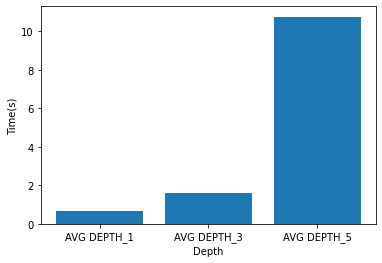

In [41]:
eje_y = [0.6569,1.5904, 10.755]
eje_x = ["AVG DEPTH_1","AVG DEPTH_3","AVG DEPTH_5"]
plt.bar(eje_x, eje_y)
plt.ylabel('Time(s)')
plt.xlabel('Depth')
plt.show()